In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench import load_results

# === Load results ===
experiments, outcomes = load_results('dike_experiments_2.tar.gz')

In [13]:
# Display a summary
print("Experiments (designs and uncertainties):")
print(experiments.head())

print("\nOutcomes (keys only):")
print(list(outcomes.keys()))


Experiments (designs and uncertainties):
   A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       11  216.780621       1.0   0.433801  283.858027   
1                       82   95.215442       1.5   0.703122  322.450624   
2                       73  267.991455       1.5   0.160434  146.614704   
3                       91  238.390714      10.0   0.211686  287.549784   
4                      105   70.300044       1.0   0.861464  129.755588   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0      10.0   0.698797  325.440404       1.5   0.301720  ...   
1      10.0   0.554337  138.863464       1.5   0.411571  ...   
2       1.0   0.907989  191.801788      10.0   0.886706  ...   
3       1.0   0.091643  332.362639      10.0   0.077169  ...   
4       1.0   0.525107  257.601929       1.5   0.508596  ...   

   A.4_DikeIncrease 0 A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
0                   0                  3                  1

In [14]:
print(len(experiments))


200


In [3]:
# Print all available outcome names
print("Available outcome names:")
for outcome_name in outcomes.keys():
    print(outcome_name)

Available outcome names:
A.1 Total Costs
A.1_Expected Number of Deaths
A.1_Minimum Water Level
A.1_95% Guaranteed Water Level
A.1_98% Guaranteed Water Level
A.2 Total Costs
A.2_Expected Number of Deaths
A.2_Minimum Water Level
A.2_95% Guaranteed Water Level
A.2_98% Guaranteed Water Level
A.3 Total Costs
A.3_Expected Number of Deaths
A.3_Minimum Water Level
A.3_95% Guaranteed Water Level
A.3_98% Guaranteed Water Level
A.4 Total Costs
A.4_Expected Number of Deaths
A.4_Minimum Water Level
A.4_95% Guaranteed Water Level
A.4_98% Guaranteed Water Level
A.5 Total Costs
A.5_Expected Number of Deaths
A.5_Minimum Water Level
A.5_95% Guaranteed Water Level
A.5_98% Guaranteed Water Level
RfR Total Costs
Expected Evacuation Costs


In [4]:
# === Define targets for PRIM ===

target = (outcomes['A.1_Minimum Water Level'] > 4) & (outcomes['A.2_Minimum Water Level'] > 4) & (outcomes['A.3_Minimum Water Level'] > 4)  & (outcomes['A.4_Minimum Water Level'] > 4) & (outcomes['A.5_Minimum Water Level'] > 5)

In [5]:
# === Run PRIM ===
prim_alg = prim.Prim(experiments, target, threshold=0.8)
box = prim_alg.find_box()


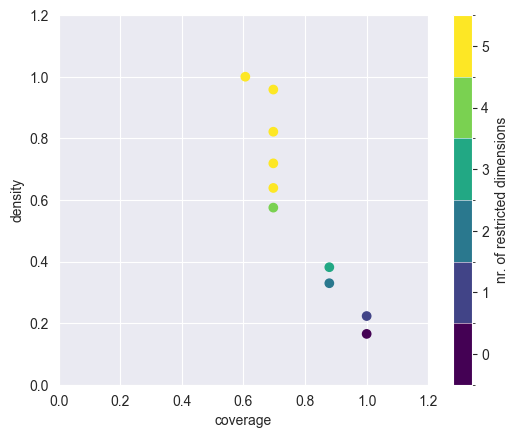

In [6]:
# === Plot and inspect ===
box.show_tradeoff()
plt.show()

In [7]:
# choose a mox that has moderate to high coverage (captures many good cases)
# and higher density

# Inspect top box
box.inspect(18)
box.inspect(18, style='graph')
plt.show()

IndexError: single positional indexer is out-of-bounds

In [ ]:
#Coverage 58.3% of the "good" cases (i.e. target = True) are in this box
# density  51.9% of the box meets your success criteria
#k 28 = There are 28 "good" cases in the box (target=True)
#mass = This box includes 18% of the total dataset (relatively small, meaning it's selective)
#n = There are 54 total cases in the box
#res_dim = 9 parameters were constrained in this box – it's fairly restrictive

#Here are the rules that define Box 15:

#Variable	Box Range / Values	Notes
#A.1_Bmax	32.7 – 333.3	Bmax for location A.1 – wide range 📊
#A.1_Brate	{10.0, 1.0}	Categorical (likely binary choice) – may cause warnings ⚠️
#discount rate 1	{1.5, 2.5, 3.5}	All values – not restricted.
#discount rate 2	{1.5, 2.5, 4.5}	All values – not restricted.
#A.0_ID flood wave shape	4 – 119	Range of inflow/flood shape parameter 📈
#A.3_pfail	0.03 – 0.896	Failure probability in section A.3
#A.3_Bmax	43.3 – 333.6	Capacity of section A.3
#A.4_pfail	0.082 – 0.996	Failure probability of section A.4
#A.1_pfail	0.042 – 0.880	Failure probability of section A.1